In [7]:
using Pkg
Pkg.activate("D:\\Science\\Code\\Julia\\envr")

  Activating project at `D:\Science\Code\Julia\envr`


In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [2]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1.0 + exp( -50.0*(y-ythr) ) )
    σ(x) = 1.0 / ( 1.0 + exp( -20.0*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1.0 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1.0-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)
    return SA[du1, du2, du3]
end;

In [3]:
t = 500.0; tt = 250.0; tstep = 0.001
trange = range(0.0, t, step = tstep)
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [4]:
τ = 0.013;  τD = 0.080;  τy = 3.3;  J = 3.07;  β = 0.300
xthr = 0.75; ythr = 0.4
α = 1.58;  U0 = 0.3;  ΔU0 = 0.305;  I0 = -1.59;

In [22]:
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = SA[8.080310252403548, 0.6821509994498387, 0.4200615005613586]
ds = ContinuousDynamicalSystem(TM, u0, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.08, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.59]
 time:          0.0
 state:         [8.080310252403548, 0.6821509994498387, 0.4200615005613586]


In [23]:
lb_size = 35; tck_size = 30;

In [24]:
tr, trange = trajectory(ds, t, Δt = tstep; Ttr = tt)

(3-dimensional StateSpaceSet{Float64} with 500001 points, 250.0:0.001:750.0)

In [25]:
ts, tf = 1, 15000

(1, 15000)

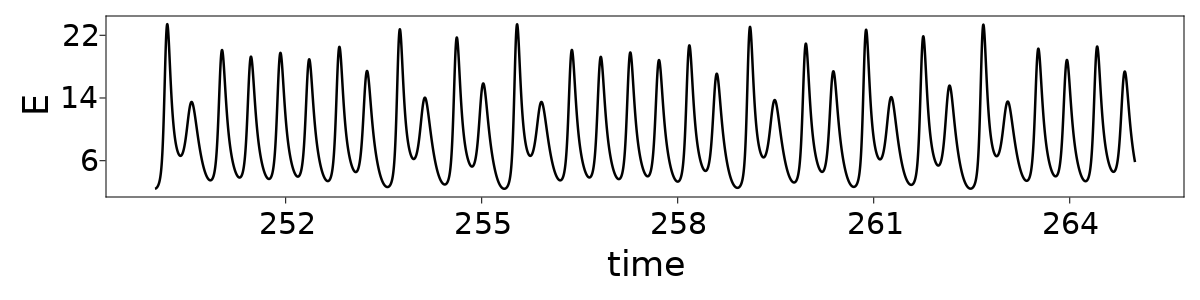

In [26]:
f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = "time", ylabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, yticks = [6, 14, 22])
lines!(axis, trange[ts:tf], tr[ts:tf, 1], linewidth = 2.5, color = :black)
f

In [27]:
# save("timeseries_chaos_Levanova.eps", f)

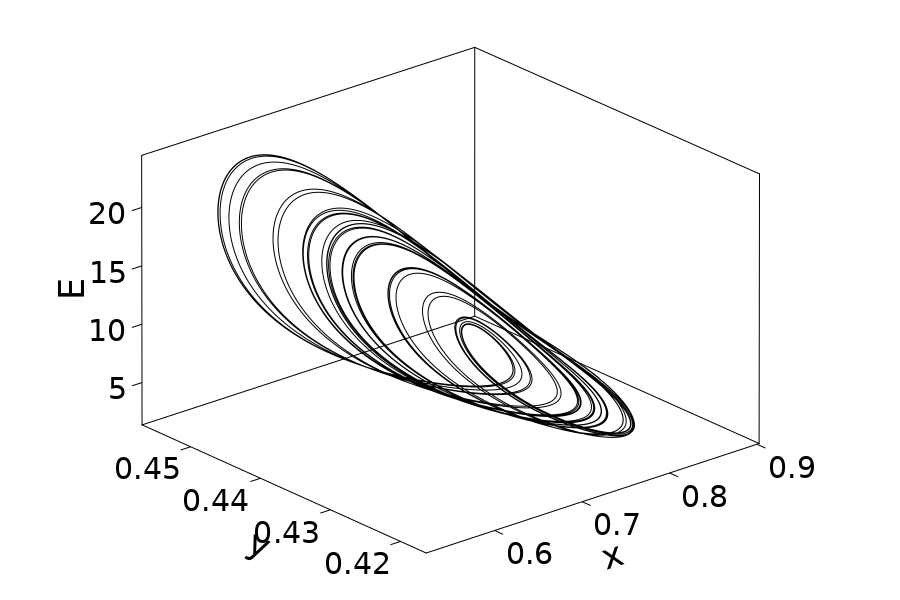

In [28]:
f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false)
                # xticks = [0.6, 0.75, 0.85], yticks = [0.42, 0.44, 0.45], zticks = [6, 12, 20])
lines!(axis3, tr[ts:tf, 2], tr[ts:tf, 3], tr[ts:tf, 1], linewidth = 1.0, color = :black)
f

In [29]:
# save("phase_chaos_Levanova.eps", f)